# Cleaning and Structuring the Label Space of the iMet Collection 2020

### Vivien Nguyen & Sunnie S. Y. Kim. [CVPR 2021 Fine-Grained Visual Categorization Workshop](https://sites.google.com/view/fgvc8)

- Paper : TBD
- Code: https://github.com/sunniesuhyoung/iMet2020cleaned
- Description: In this notebook, we demonstrate our proposed changes and clean/structure the iMet 2020 (training) labels. For compatibility, we don't change the size of the label space (3,474 attributes) and only make modifications that involve adding attribute label(s) to certain samples.

## 0. Load libraries and files

In [13]:
import pickle, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Levenshtein as lev
from itertools import combinations

In [2]:
train_labels_path = '../yandex/folds.csv'
test_labels_path = '../imet-2020-fgvc7/private_solution.csv'
sample_submission_path = '../imet-2020-fgvc7/sample_submission.csv'
attributes_path = 'attributes.csv'

In [3]:
train_labels = pd.read_csv(train_labels_path) # Training labels
test_labels = pd.read_csv(test_labels_path) # Test labels
sample_submission = pd.read_csv(sample_submission_path) # List of a smaller test subset
attributes = pd.read_csv(attributes_path) # Attribute ID, name, etc.

## 1. Encode AND relationships as separate labels

**Method**: We identify attributes with "and" in their names.

**Modification**: When an "and" attribute is labeled, we also label its smaller tokens that exist as separate labels.

In [4]:
# Identfify attributes with 'and' in their names
and_id = []; and_name = []
for i in range(3474):
    name = attributes.name[i]
    if ' and ' in name: and_id.append(i); and_name.append(name)
print(len(and_id), 'attributes have "and" in ther names')

334 attributes have "and" in ther names


In [5]:
# For each 'and' attribute, check if their smaller tokens are existing attributes
count_all_in = 0; count_none_in = 0; count_some_in = 0
for i in range(len(and_id)):
    split = and_name[i].split(' and ')
    all_in = True; none_in = True
    for n in split:
        if n in list(attributes.name): none_in = False
        else: all_in = False
    if all_in: count_all_in += 1
    elif none_in: count_none_in += 1
    else: count_some_in += 1
print(count_all_in, count_none_in, count_some_in)

170 30 134


In [6]:
# Make modifications to the label set
for j in range(train_labels.shape[0]):
    orig_attr = [int(i) for i in train_labels['attribute_ids'].loc[j].split(' ')]
    new_attr = copy.deepcopy(orig_attr)
    for attr in orig_attr:
        if attr in and_id:
            split_name = attributes.name[attr].split(' and ')
            for n in split_name:
                if n in list(attributes.name):
                    # Find which attribute id to be map to
                    if n == 'egypt': replace_id = 23
                    elif n == 'french': replace_id = 341
                    else: replace_id = int(attributes['attribute_id'][attributes.name==n])
                    # Add that attribute id if it's not already in new_attr
                    if replace_id not in new_attr: new_attr.append(replace_id)

    new_attr = [str(a) for a in new_attr]
    new_attr = ' '.join(new_attr)
    train_labels.loc[j, 'attribute_ids'] = new_attr

## 2. Encode OR relationships as separate labels

**Method**: We identify attributes with "or" in their names. We separate the attribute name into smaller tokens using "or" as the separator.

**Modification**: When an "or" attribute is labeled, we also label its smaller tokens that exist as separate labels.

In [7]:
# Identfify attributes with 'or' in their names
or_id = []; or_name = []
for i in range(3474):
    name = attributes.name[i]
    if ' or ' in name: or_id.append(i); or_name.append(name)
print(len(or_id), 'attributes have "or" in ther names')

117 attributes have "or" in ther names


In [8]:
# For each 'or' attribute, check if their smaller tokens are existing attributes
count_all_in = 0; count_none_in = 0; count_some_in = 0;
for i in range(117):
    split = or_name[i].split(' or ')
    all_in = True; none_in = True
    for n in split:
        if n in list(attributes.name): none_in = False
        else: all_in = False
    if all_in: count_all_in += 1
    elif none_in: count_none_in += 1
    else: count_some_in += 1
print(count_all_in, count_none_in, count_some_in)

77 11 29


In [9]:
# Make modifications to the label set
for j in range(train_labels.shape[0]):
    orig_attr = [int(i) for i in train_labels['attribute_ids'].loc[j].split(' ')]
    new_attr = copy.deepcopy(orig_attr)
    for attr in orig_attr:
        if attr in or_id:
            split_name = attributes.name[attr].split(' or ')
            for n in split_name:
                if n in list(attributes.name):
                    # Find which attribute id to be map to
                    if attr == 16 and n == 'colombia': replace_id = 15
                    elif attr == 16 and n == 'ecuador': replace_id = 22
                    elif attr == 18 and n == 'costa rica': replace_id = 17
                    elif attr in [25, 26] and n == 'egypt': replace_id = 23
                    elif attr == 30 and n == 'france': replace_id = 29
                    elif attr == 38 and n == 'guatemala': replace_id = 37
                    elif attr == 38 and n == 'mexico': replace_id = 60
                    elif attr == 43 and n == 'india': replace_id = 42
                    elif attr in [43, 47, 48, 49, 50] and n == 'iran': replace_id = 45
                    elif attr in [127, 192] and n == 'french': replace_id = 341
                    elif attr == 235 and n == 'china': replace_id = 233
                    elif attr == 235 and n == 'japan': replace_id = 448
                    elif attr == 260 and n == 'costa rica': replace_id = 259
                    elif attr in [343, 344, 345, 346, 347, 348, 349, 363, 439, 680, 751] and n == 'french': replace_id = 341
                    elif attr in [363, 372, 373, 374, 375, 441] and n == 'greek': replace_id = 370
                    else: replace_id = int(attributes['attribute_id'][attributes.name==n])
                    # Add that attribute id if it's not already in new_attr
                    if replace_id not in new_attr: new_attr.append(replace_id)

    new_attr = [str(a) for a in new_attr]
    new_attr = ' '.join(new_attr)
    train_labels.loc[j, 'attribute_ids'] = new_attr

## 3. Encode mutually exclusive relationships

The only set of attributes we found to be mutually exclusive is the dimension attributes: large (781), medium (782), small (783), tiny (784), very large (785). We don't make any modification to the labels, but in the paper, we explore changing the evaluation scheme for mutually exclusivie attributes.

In [10]:
attributes.loc[781:785]

,attribute_id,attribute_name,category,name,train_count,test_count
781,781,dimension::large,dimension,large,21142,10923
782,782,dimension::medium,dimension,medium,20672,11703
783,783,dimension::small,dimension,small,19881,11874
784,784,dimension::tiny,dimension,tiny,19602,12309
785,785,dimension::very large,dimension,very large,20657,11313


## 4. Merge identical attributes

We focused on identifying and merging identical attributes in the **medium** category because the other four categories (**culture**, **country**, **dimensions**, **tags**) have very few or zero identical attributes.

**Method**: We first calculated the Levenshtein ratio between all pairs of attributes, then manually verified 200 pairs with the highest ratio (most similar). We identified 104 identical attribute pairs. 

**Modification**: For each pair, whenever one attribute is labeled, we label the other attribute.

In [11]:
# Calculate Levenshtein ratio
pairs = list(combinations(list(attributes.loc[attributes['category']=='medium', 'name']), 2))
lev_ratio_list = []
for pair in pairs:
    lev_ratio_list.append(lev.ratio(pair[0].lower(), pair[1].lower()))

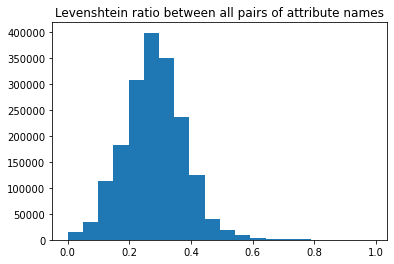

In [14]:
# Plot historgram
plt.hist(lev_ratio_list, bins=20)
plt.title('Levenshtein ratio between all pairs of attribute names')
plt.show()

In [15]:
# Sort the pairs by descending 
lev_ratio = np.array(lev_ratio_list)
pairs = np.array(pairs)
descending = (-lev_ratio).argsort()
pairs = pairs[descending]
lev_ratio = lev_ratio[descending]

In [16]:
# Medium exceptions (found with manual verification)
exception = [20, 37, 52, 53, 54, 61, 67, 68, 69, 73, 74, 75, 76, 81]
exception += [82, 83, 84, 85, 87, 88, 89, 90, 93, 94, 96, 97, 98]
exception += [99, 102, 104, 109, 114, 115, 116, 117, 118, 121]
exception += [124, 125, 127, 128, 129, 130, 131, 132, 137, 139]
exception += [140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151]
exception += [152, 153, 154, 155, 156, 159, 161, 162, 163, 165, 168]
exception += [169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183]
exception += [184, 185, 186, 187, 188, 189, 192, 193, 194, 195, 197, 198, 199]

In [17]:
# Create a dictionary of identical attributes
identical_pairs = {}
for i in range(200):
    a, b = pairs[i]
    if i not in exception:
        a_id = int(attributes[(attributes.name==a) & (attributes.category=='medium')].attribute_id)
        b_id = int(attributes[(attributes.name==b) & (attributes.category=='medium')].attribute_id)
        if a_id in identical_pairs.keys():
            print('\nThis pair: {}({}) - {}({})'.format(a, a_id, b, b_id))
            print('Existing pair: {}({}) - {}'.format(a, a_id, identical_pairs[a_id]))
            identical_pairs[a_id].append(b_id)
            print('Final pair: {}({}) - {}'.format(a, a_id, identical_pairs[a_id]))
        else:
            identical_pairs[a_id] = [b_id]
        if b_id in identical_pairs.keys(): 
            print('\nThis pair: {}({}) - {}({})'.format(b, b_id, a, a_id))
            print('Existing pair: {}({}) - {}'.format(b, b_id, identical_pairs[b_id]))
            identical_pairs[b_id].append(a_id)
            print('Final pair: {}({}) - {}'.format(b, b_id, identical_pairs[b_id]))
        else:
            identical_pairs[b_id] = [a_id]
    
    if False:
        print()
        print(i, lev_ratio[i])
        print(a)
        print(b)
        display(attributes[(attributes.name==a) | (attributes.name==b)])


This pair: color lithograph(1115) - colored lithograph(1122)
Existing pair: color lithograph(1115) - [1117]
Final pair: color lithograph(1115) - [1117, 1122]

This pair: metallic thread on silk(1795) - metal thread on silk(1786)
Existing pair: metallic thread on silk(1795) - [1796]
Final pair: metallic thread on silk(1795) - [1796, 1786]

This pair: color lithography(1117) - colored lithograph(1122)
Existing pair: color lithography(1117) - [1115]
Final pair: color lithography(1117) - [1115, 1122]

This pair: colored lithograph(1122) - color lithography(1117)
Existing pair: colored lithograph(1122) - [1115]
Final pair: colored lithograph(1122) - [1115, 1117]

This pair: glaze(1439) - glazes(1448)
Existing pair: glaze(1439) - [1440]
Final pair: glaze(1439) - [1440, 1448]

This pair: polychrome(2084) - polychromy(2100)
Existing pair: polychrome(2084) - [2092]
Final pair: polychrome(2084) - [2092, 2100]

This pair: silk and metal thread(2313) - silk & metal thread(2300)
Existing pair: sil

In [18]:
# Make modifications to the label set
for j in range(train_labels.shape[0]):
    orig_attr = [int(i) for i in train_labels['attribute_ids'].loc[j].split(' ')]
    new_attr = copy.deepcopy(orig_attr)
    for attr in orig_attr:
        if attr in list(identical_pairs.keys()):
            identical_attr = identical_pairs[attr]
            for a in identical_attr:
                if a not in new_attr:
                    new_attr.append(a)

    new_attr = [str(a) for a in new_attr]
    new_attr = ' '.join(new_attr)
    train_labels.loc[j, 'attribute_ids'] = new_attr

## 5. Label supercategories

Again, we focused on identifying super/sub-categories in the **medium** category because the other four categories (**culture**, **country**, **dimensions**, **tags**) have very few or zero of such relationships.

**Method**: For each attribute, we identify other attributes that contain its name (e.g. "black and brown ink (852)" contains "brown ink (965)") and determine them as subcategories.

**Modification**: Whenever a subcategory (e.g. black and brown ink) is labeled, we label its supercategory (e.g. brown ink).

In [19]:
# Get a list of attribute names
names = list(attributes.name[attributes.category=='medium'])
ids = list(attributes.attribute_id[attributes.category=='medium'])

In [20]:
# Create a dictionary of super/sub-categories
supsub_pairs = {}
for i in range(len(ids)):
    attr1_id = ids[i]
    attr1 = names[i]
    for j in range(len(ids)):
        attr2_id = ids[j]
        attr2 = names[j]
        if attr1 != attr2:
            if attr1 in attr2:
                # Add pair to the dictionary (key: subcategory, value: list of supercategories)
                if attr2 in supsub_pairs.keys(): supsub_pairs[attr2_id].append(attr1_id)
                else: supsub_pairs[attr2_id] = [attr1_id]
                    
                # print('[{}] ({}) in [{}] ({})'.format(attr1, attr1_id, attr2, attr2_id))

In [21]:
# Make modifications to the label set
for j in range(train_labels.shape[0]):
    orig_attr = [int(i) for i in train_labels['attribute_ids'].loc[j].split(' ')]
    new_attr = copy.deepcopy(orig_attr)
    for attr in orig_attr:
        if attr in list(supsub_pairs.keys()):
            sup_attr = supsub_pairs[attr]
            for a in sup_attr:
                if a not in new_attr:
                    new_attr.append(a)

    new_attr = [str(a) for a in new_attr]
    new_attr = ' '.join(new_attr)
    train_labels.loc[j, 'attribute_ids'] = new_attr

## 6. Output the cleaned label set

In [22]:
train_labels.to_csv('cleaned_training_labels.csv', index=False)